# Sommaire :

<a href="#A3">**Part 3 : Feasibility for a text classifier**</a>

<a href="#A4">**Part 4 : Feasibility for an image classifier**</a>

## <a name="A3">**Part 3 : Feasibility for a text classifier**</a>

## Text Features Extraction (CountVectorizer and TfidfVectorizer)

In [25]:
# colorisation de la matrice
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [26]:
%%time
text_list = list(df['combined'])
#count_vectorizer method
count_cv = CountVectorizer()
tf_cv = count_cv.fit_transform(text_list)
tf_feature_names_cv = count_cv.get_feature_names_out()

#tf-idf method
count_tf = TfidfVectorizer()
tf_tf = count_tf.fit_transform(text_list)
tf_feature_names_tf = count_tf.get_feature_names_out()

print('Term Frequency of Document')
cv = pd.DataFrame(tf_cv.toarray(), columns = tf_feature_names_cv) / len(tf_feature_names_cv)
cv.style.set_caption("Term Frequency of Document")
cv.style.applymap(color)
cv.head()

tf = pd.DataFrame(tf_tf.toarray(), columns = tf_feature_names_tf) / len(tf_feature_names_tf)
tf.style.set_caption("Term Frequency of Document")
tf.style.applymap(color)
tf.head()

Term Frequency of Document
CPU times: total: 266 ms
Wall time: 342 ms


,aa,ability,able,abode,abroad,absolute,absorbency,absorbent,absorber,absorbing,...,young,youth,youthful,youve,zero,zinc,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_cv = pd.concat([cv,df['class_']], axis=1)
df_tf = pd.concat([tf,df['class_']], axis=1)

## T-SNE et clustering

In [28]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, l_cat) :
    time1 = time.time()
    num_labels=len(set(l_cat))
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    
    # #Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(y_cat_num), loc="best", title="Categorie")#--------------l_cat
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

## 1st approach : BOW – CountVectorizer

In [29]:
# Définition of X and y
df_ = df_cv
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [30]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

CountVectorizer : 
-----------------
ARI :  0.3883 time :  20.0


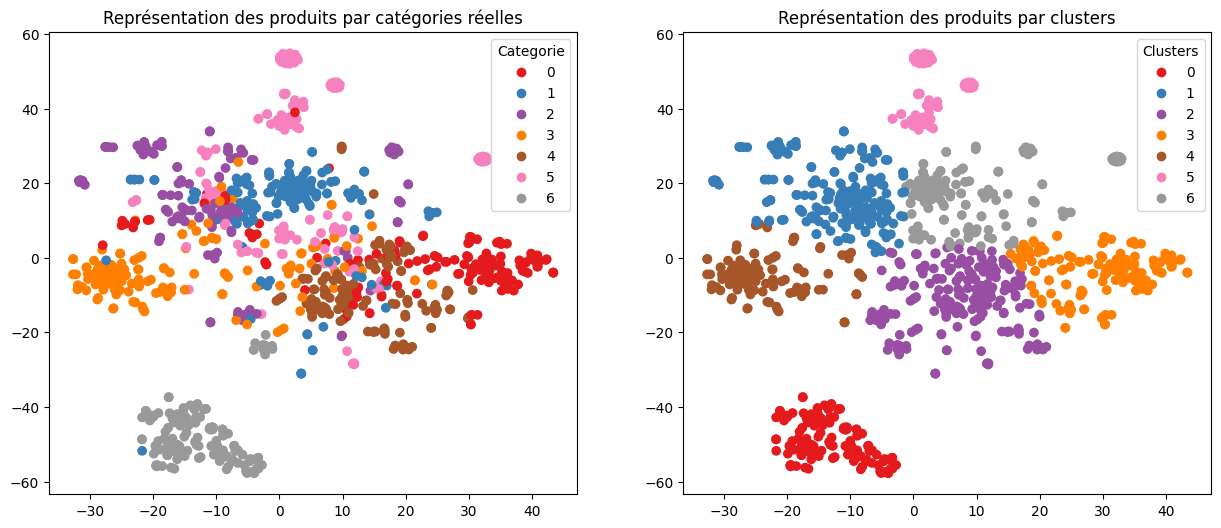

ARI :  0.3883


In [31]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 2nd approach : BOW – TfidfVectorizer

In [32]:
# Définition of X and y
df_ = df_tf
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [33]:
print("TfidfVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

TfidfVectorizer : 
-----------------
ARI :  0.3966 time :  18.0


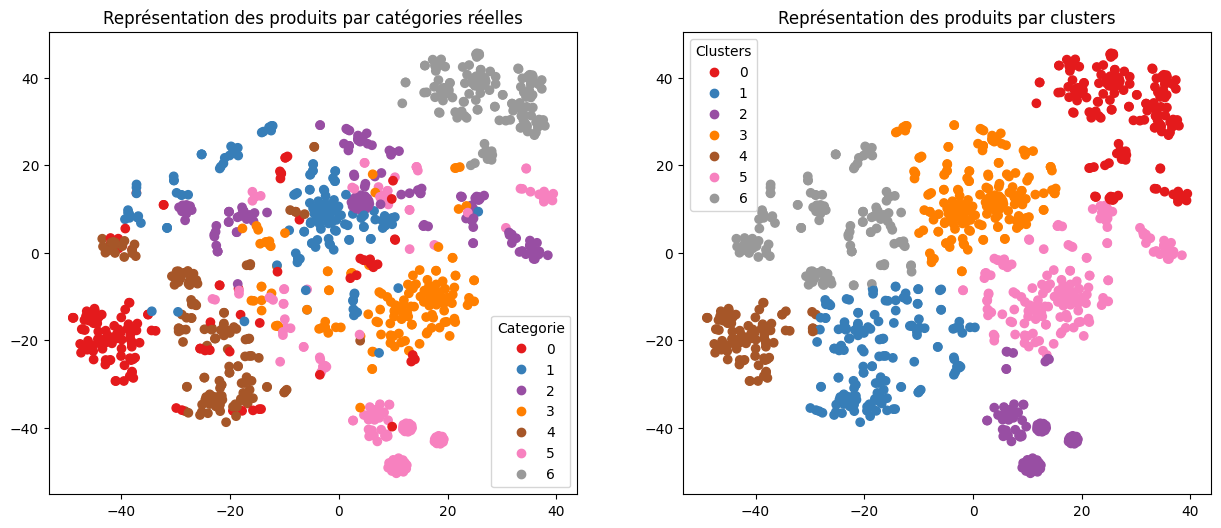

ARI :  0.3966


In [34]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 3rd approach : word embedding – Word2Vec

In [35]:
# Instanciation du modèle Word2Vec

# Initialisation

#{'workers': 11, 'negative': 5, 'vector_size': 300, 'sample': 0, 'min_count': 1, 'dm': 0}

w2v_sg=1
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df['cleaned'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

#w2v_model = Word2Vec(sg=0,min_count=1,window=3)#,workers=cores-1) size=100,
#w2v_model.build_vocab(df.tokenized, progress_per=1000)

# Création du modèle Word2Vec

w2v_model = gensim.models.Word2Vec(sg=w2v_sg,
                                                min_count=w2v_min_count, 
                                                window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())

In [36]:
%%time
# Entraînement du modèle Word2Vec

print("train Word2Vec model ...")
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

train Word2Vec model ...
Vocabulary size: 5430
Word2Vec trained
CPU times: total: 1min
Wall time: 1min 2s


In [37]:
%%time
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5431
CPU times: total: 109 ms
Wall time: 100 ms


In [38]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5431, 300)


In [39]:
# Création du modèle d'embedding

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1629300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,629,300
Trainable params: 1,629,300
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Execution du modèle d'embedding

embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 3ms/step


(1048, 300)

In [41]:
ARI, X_tsne, labels = ARI_fct(embeddings,y)

ARI :  0.2034 time :  16.0


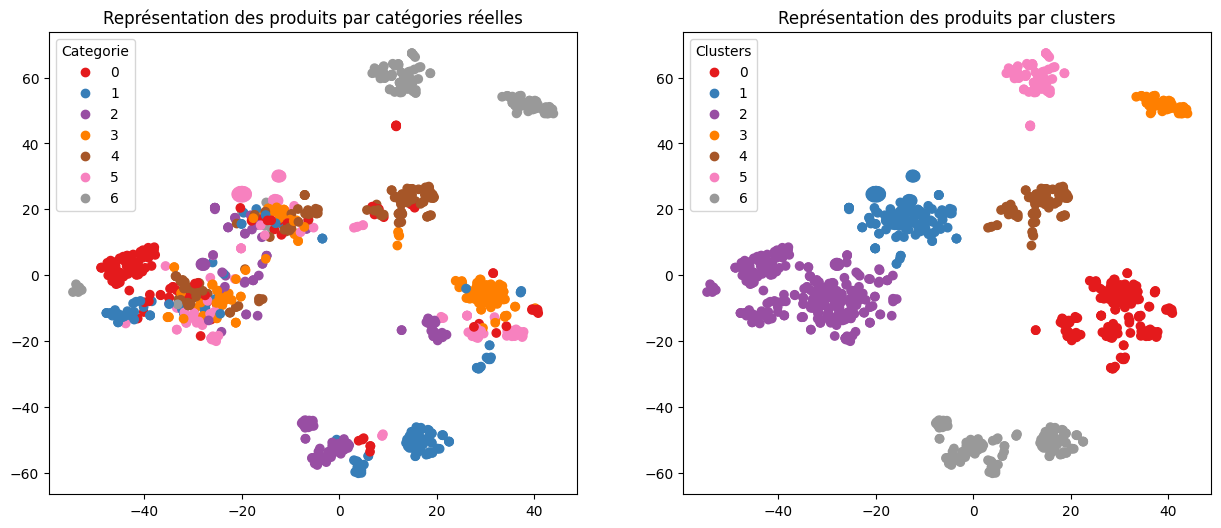

ARI :  0.2034


In [42]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 4th approach : Word embedding – BERT

In [43]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [44]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\John\Desktop\Formation\venv\lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
C:\Users\John\Desktop\Formation\venv\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [45]:
max_length = 295
batch_size = 8
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['cleaned'].to_list()

In [73]:
%%time
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 6s 6s/step
temps traitement :  869.0
CPU times: total: 42min 19s
Wall time: 14min 29s


In [ ]:
features_bert.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert,y)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 5th approach : Word embedding – USE

In [65]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [66]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [67]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [68]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [69]:
batch_size = 8
sentences = df['cleaned'].to_list()

In [71]:
%%time
features_USE = feature_USE_fct(sentences, batch_size)

CPU times: total: 1.61 s
Wall time: 949 ms


In [72]:
ARI, X_tsne, labels = ARI_fct(features_USE, y)

ARI :  0.4295 time :  16.0


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="A4">**Part 4 : Feasibility for an image classifier**</a>

In [1]:
pip uninstall opencv-python --yes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python==4.5.1.48

Note: you may need to restart the kernel to use updated packages.


In [3]:
# General
import sys
import numpy as np
import pandas as pd
import os
from os import listdir
import time

# Préprocessing
from sklearn import preprocessing

# Visualisation
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

# Modèle 
import cv2

# Dépôt Github
from github import Github

# Importation d'images
from PIL import Image
import urllib.request
import io

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# Product description (cleaned)
df = pd.read_csv("df.csv")

## Input

In [5]:
df.image

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       d4684dcdc759dd9cdf41504698d737d8.jpg
3       6325b6870c54cd47be6ebfbffa620ec7.jpg
4       893aa5ed55f7cff2eccea7758d7a86bd.jpg
                        ...                 
1043    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1044    fd6cbcc22efb6b761bd564c28928483c.jpg
1045    5912e037d12774bb73a2048f35a00009.jpg
1046    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1047    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1048, dtype: object

In [6]:
# LabelEncoding of the categories 'class_'
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["class_"])

In [7]:
list_labels = list(set(df.class_))
list_labels

['Beauty and Personal Care',
 'Watches',
 'Home Furnishing',
 'Kitchen & Dining',
 'Home Decor & Festive Needs',
 'Baby Care',
 'Computers']

Beauty and Personal Care


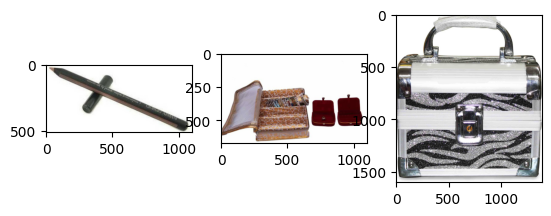

Watches


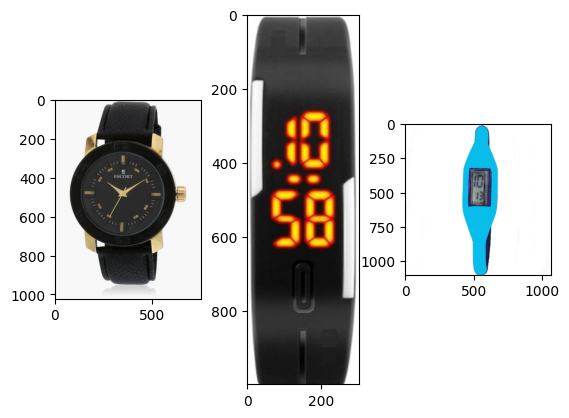

Home Furnishing


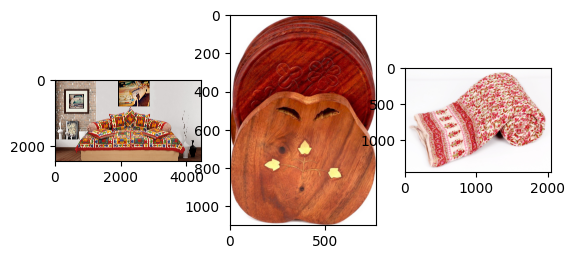

Kitchen & Dining


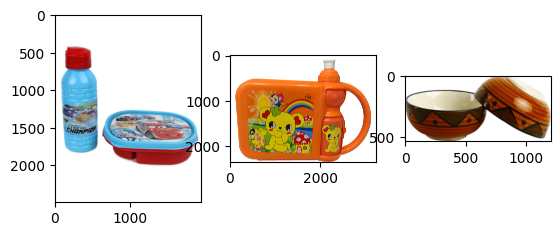

Home Decor & Festive Needs


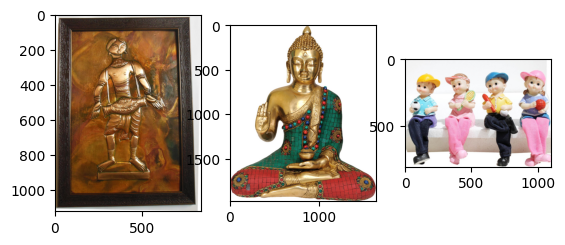

Baby Care


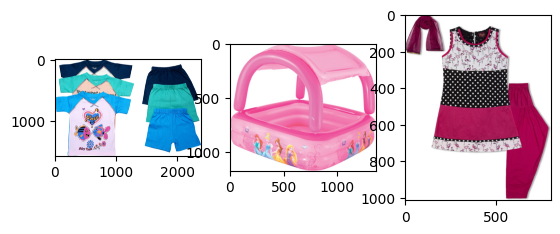

Computers


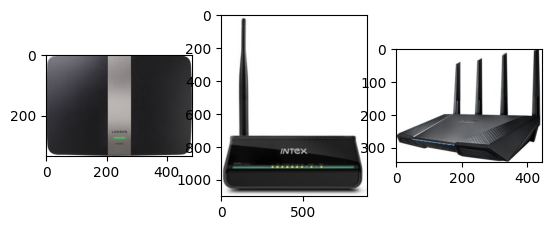

In [8]:
# Visualisation of examples
im = 'https://raw.githubusercontent.com/Antoine1608/OC-DS-P6-Classifiez_automatiquement_biens_consommation/main/Images/'
def list_fct(name) :
    list_image_name = [df.image[i] for i in range(len(df)) if df["class_"][i]==name]
    return list_image_name

list_Baby_Care=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Baby Care"]
list_Beauty_and_Personal_Care=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Beauty and Personal Care"]
list_Computers=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Computers"]
list_Home_Decor_Festive_Need=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Home Decor & Festive Need"]
list_Watches=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Watches"]
list_Home_Furnishing=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Home Furnishing"]
list_Kitchen_Dining=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Kitchen & Dining"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)

        filename = im + list_fct(name)[i+10]
#'https://raw.githubusercontent.com/florabajolet/OCR6_NLP_computer_vision/main/images/'
        with urllib.request.urlopen(filename) as url_response:
            image_bytes = io.BytesIO(url_response.read())
            img = Image.open(image_bytes)

        plt.imshow(img)
    plt.show()

In [9]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [10]:
cv2.__version__

'4.5.1'

[ WARN:0] global /tmp/pip-req-build-jr1ur_cf/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


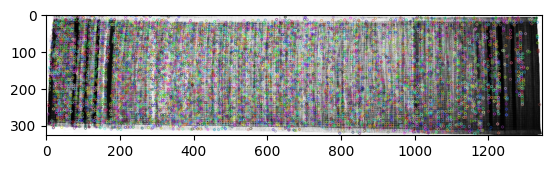

Descripteurs :  (13178, 128)

[[41.  3.  0. ...  0.  0.  0.]
 [28.  1.  0. ...  0.  0.  0.]
 [ 1.  0.  1. ...  0.  0.  1.]
 ...
 [ 1.  1.  1. ...  0.  0.  4.]
 [ 1.  1.  3. ...  0.  0.  2.]
 [ 1.  1.  1. ...  0.  0.  0.]]


In [11]:
# Détermination et affichage des descripteurs SIFT
sift = cv2.xfeatures2d.SIFT_create()
filename = 'image.jpg'
image = cv2.imread(filename,0) # convert in gray
#image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## 1st approach : SIFT

## defining descriptors for each image
* For each image change to gray and equalization
* creation of a list of descriptors per image ("sift_keypoints_by_img") which will be used to produce the histograms per image
* creation of a list of descriptors for all the images ("sift_keypoints_all") which will be used to create the descriptor clusters

In [12]:
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(df.image)) : #len(os.listdir(im)
    if image_num%100 == 0 : print(image_num)
    #filename = r'https://raw.githubusercontent.com/Antoine1608/OC-DS-P6-Classifiez_automatiquement_biens_consommation/main/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'
    filename = 'dataset_train/' + df['image'][image_num]
    image = cv2.imread(filename,0) # convert in gray

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram (étire l'histogramme et uniformise la cumsum)
    #res = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')   # normalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
dataset_train/55b85ea15a1536d46b7190ad6fff8ce7.jpg
dataset_train/7b72c92c2f6c40268628ec5f14c6d590.jpg
dataset_train/d4684dcdc759dd9cdf41504698d737d8.jpg
dataset_train/6325b6870c54cd47be6ebfbffa620ec7.jpg
dataset_train/893aa5ed55f7cff2eccea7758d7a86bd.jpg
dataset_train/f355cc1ccb08bd0d283ed979b7ee7515.jpg
dataset_train/dd0e3470a7e6ed76fd69c2da27721041.jpg
dataset_train/41384da51732c0b4df3de8f395714fbb.jpg
dataset_train/710ed5f2393a4b9e8823aa0029f71f93.jpg
dataset_train/920154acbe49d3202ed7d2ed2df1ea13.jpg
dataset_train/08452abdadb3db1e686b94a9c52fc7b6.jpg
dataset_train/1e8741b5ae27a513546c94b3f3312aee.jpg
dataset_train/189fa66a5fa6f08d2802a62ecf0be298.jpg
dataset_train/bbb8cdc5406ff60ff06ff64630f2ca47.jpg
dataset_train/1120bc768623572513df956172ffefeb.jpg
dataset_train/5479bb7028827d60000720a2c135976a.jpg
dataset_train/733aa1e801a139fa8dc7be9f0eff5ee0.jpg
dataset_train/62c35de4df27437d3597963fac55a8b6.jpg
dataset_train/33d97d63c037078cd3f08033966d6a88.jpg
dataset_train/d7ca2b06b4f4d3b

## Creation of descriptor clusters
* Using MiniBatchKMeans to Achieve Reasonable Processing Times

In [14]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             4.54 secondes


## Creation of image features
* For each picture:
   - prediction of cluster numbers of each descriptor
   - creation of a histogram = count for each cluster number of the number of descriptors of the image

In [15]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             3.22 secondes


### PCA dimension reduction
* The PCA reduction makes it possible to create features uncorrelated between them, and to reduce their dimension, while keeping a high level of explained variance (99%)
* Impact is better data separation via T-SNE and reduced T-SNE processing time

In [16]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1048, 719)
Dimensions dataset après réduction PCA :  (1048, 499)


### T-SNE dimension reduction
* 2-component T-SNE dimension reduction for 2D image display

In [17]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df.class_
print(df_tsne.shape)


(1048, 3)


## Visual analysis: T-SNE display according to image categories
* There is no clear separation between clusters

/tmp/ipykernel_6532/2178615205.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


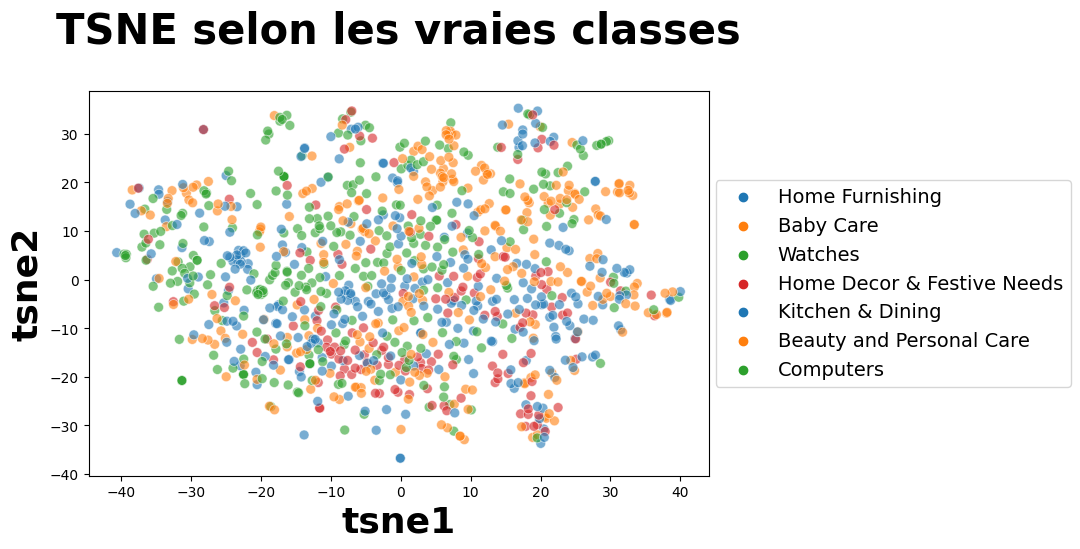

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},
          loc='center right',
           bbox_to_anchor=(1.1, 0, 0.5, 1)) 

plt.show()

## Measurement analysis: similarity between categories and clusters

### Creating clusters from the T-SNE

In [2]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


NameError: name 'X_tsne' is not defined

### Display of images according to clusters and ARI calculation of similarity categories images / clusters
* The ARI score of 0.15 remains low

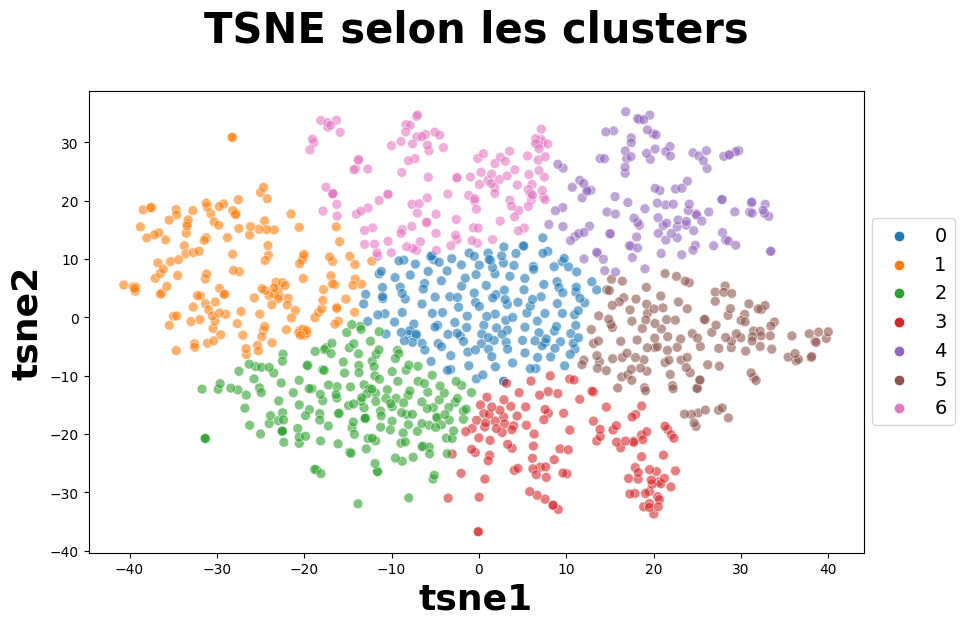

ARI :  0.05589862628438723


In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},
loc='center right',
           bbox_to_anchor=(0.63, 0, 0.5, 1)) 

plt.show()

labels = df["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analysis by classes
* The confusion matrix must be transformed to have in column the same order of the assumed categories as in row
* Using the "argmax" function to match classes with clusters

In [21]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    173
1    162
2    187
3    124
4    123
5    143
6    136
Name: class, dtype: int64

In [22]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[25 18 30 19  6 39 12]
 [17 12 12 15 53  5 36]
 [15 54 34 12  6  8 21]
 [21 10 39 38  7 24 10]
 [16 15 20 20 13 55 11]
 [44 34 32 12  8  7 13]
 [35 19 20  8 30  5 33]]


In [24]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    #corresp = [3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [5 2 3 3 1 4 1]
[[ 0 18 18 49 39 25  0]
 [ 0 89 12 27  5 17  0]
 [ 0 27 54 46  8 15  0]
 [ 0 17 10 77 24 21  0]
 [ 0 24 15 40 55 16  0]
 [ 0 21 34 44  7 44  0]
 [ 0 63 19 28  5 35  0]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.34      0.59      0.44       150
           2       0.33      0.36      0.35       150
           3       0.25      0.52      0.33       149
           4       0.38      0.37      0.38       150
           5       0.25      0.29      0.27       150
           6       0.00      0.00      0.00       150

    accuracy                           0.30      1048
   macro avg       0.22      0.30      0.25      1048
weighted avg       0.22      0.30      0.25      1048



<Axes: >

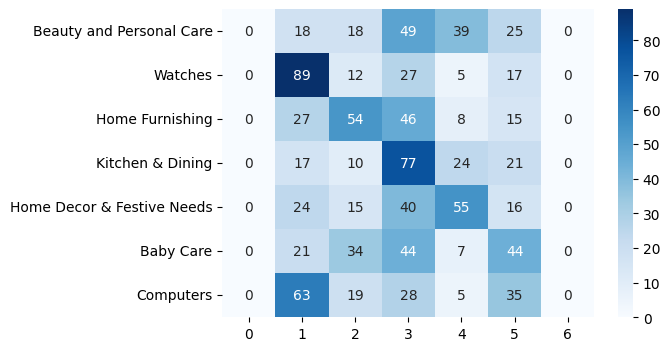

In [26]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [4]:
# Product description (cleaned)
df = pd.read_csv("df.csv")

## 2nd approach : CNN – VGG16

## Création du modèle pré-entraîné

In [23]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

2023-03-14 17:15:52.625406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
## Création des features des images

In [25]:
%%time
images_features = []
i=0 
for image_file in df["image"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(f'Images/{image_file}', target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model
#Users/antoine.naudy/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


/anaconda/envs/jupyter_env/lib/python3.8/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1048, 4096)

In [26]:
## Réduction dimension et analyse

In [27]:
### Réduction de dimension PCA

In [28]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1048, 4096)
(1048, 801)


In [29]:
### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [30]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             5.21 secondes


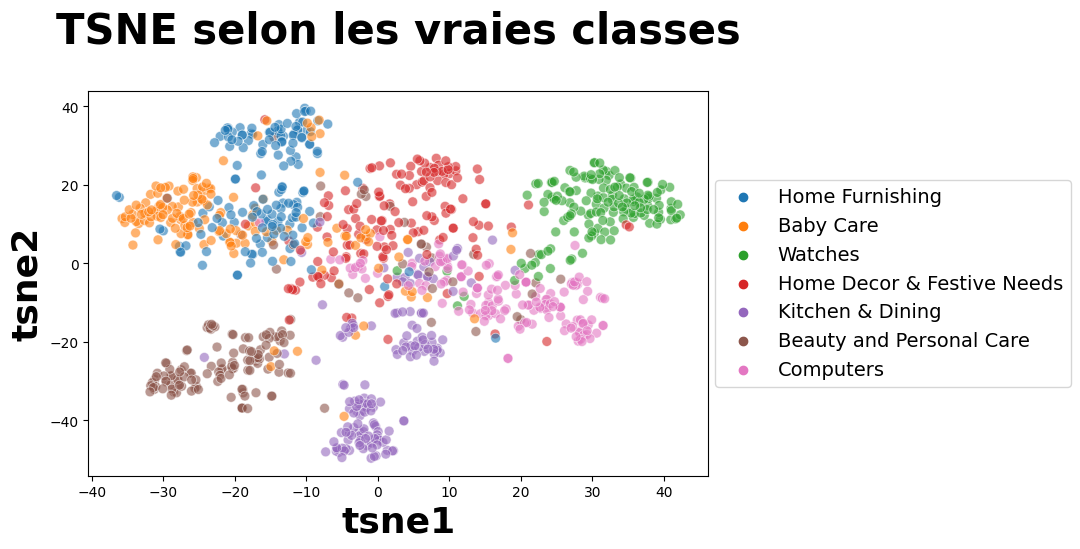

In [32]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["class_"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, 
            loc='center right',
            bbox_to_anchor=(1.1, 0, 0.5, 1)) 

plt.show()

* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement

In [33]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

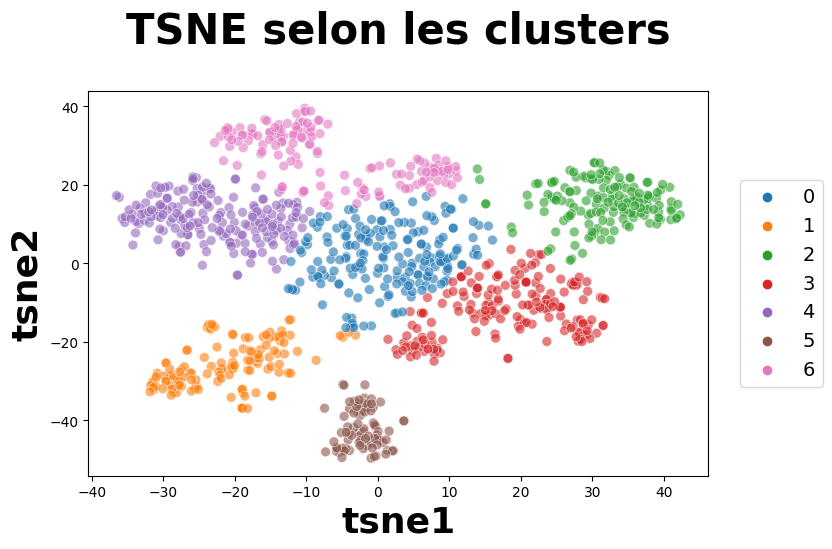

ARI :  0.45465227100429184


In [34]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},
            loc = 'center right',
            bbox_to_anchor=(0.7,0,0.5,1)) 

plt.show()

labels = df["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [35]:
compare = pd.DataFrame()
compare['class_'] = df_tsne['class']
compare['label'] = df['label']
compare['cluster'] = df_tsne['cluster']
compare.groupby(['class_','label','cluster']).size()

class_                      label  cluster
Baby Care                   0      0           23
                                   1            4
                                   2            1
                                   3            3
                                   4          107
                                   5            1
                                   6           10
Beauty and Personal Care    1      0           14
                                   1          116
                                   3            9
                                   4            5
                                   5            1
                                   6            5
Computers                   2      0           35
                                   2            1
                                   3          113
                                   4            1
Home Decor & Festive Needs  3      0           82
                                   1            1
       

In [36]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"

list_shine_0 = [i for i in range(len(df["image"])) \
                if (df.iloc[i]['class_']=='Watches') and (df_tsne.iloc[i]['cluster']==4)]
list_shine_0[0:60]

[]

tsne1      35.747684
tsne2      11.707397
class        Watches
cluster            2
Name: 4, dtype: object


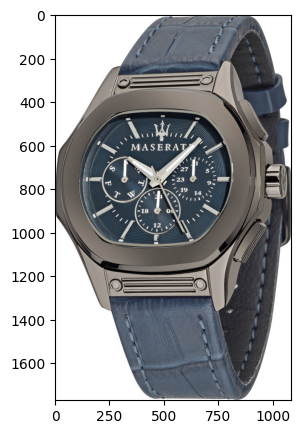

In [37]:
# Affichage image "Home Furnishing" considérée comme "Home Decor and Festive"
id = 4
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = df['image'][id]
image = imread(f'Images/{filename}')
plt.imshow(image)
plt.show()

* Analyse : le modèle pré-entraîné confond un tapis de sol avec un tapis de souris ...

In [38]:
### Analyse par classes

In [39]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 23   4   1   3 107   1  10]
 [ 14 116   0   9   5   1   5]
 [ 35   0   1 113   1   0   0]
 [ 82   1   8   5   3   0  50]
 [  5   0   0   1  70   0  74]
 [ 30   6   0  36   0  78   0]
 [  2   0 137  11   0   0   0]]


In [40]:
corresp_ = np.argmax(df.class_, axis=0)
df.class_

0       Home Furnishing
1             Baby Care
2       Home Furnishing
3       Home Furnishing
4               Watches
             ...       
1043          Baby Care
1044          Baby Care
1045          Baby Care
1046          Baby Care
1047          Baby Care
Name: class_, Length: 1048, dtype: object

In [41]:
labels

0       4
1       0
2       4
3       4
4       6
       ..
1043    0
1044    0
1045    0
1046    0
1047    0
Name: label, Length: 1048, dtype: int64

In [45]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    #corresp = [2,6,4,1,5,0,3]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [46]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [3 1 6 2 0 5 4]
[[107   4   3  23  10   1   1]
 [  5 116   9  14   5   1   0]
 [  1   0 113  35   0   0   1]
 [  3   1   5  82  50   0   8]
 [ 70   0   1   5  74   0   0]
 [  0   6  36  30   0  78   0]
 [  0   0  11   2   0   0 137]]

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       149
           1       0.91      0.77      0.84       150
           2       0.63      0.75      0.69       150
           3       0.43      0.55      0.48       149
           4       0.53      0.49      0.51       150
           5       0.97      0.52      0.68       150
           6       0.93      0.91      0.92       150

    accuracy                           0.67      1048
   macro avg       0.71      0.67      0.68      1048
weighted avg       0.71      0.67      0.68      1048



<AxesSubplot: >

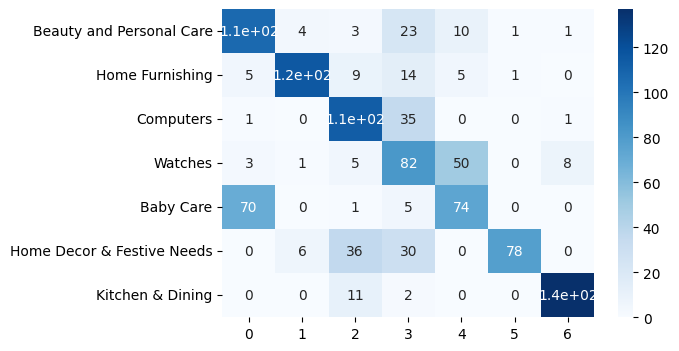

In [47]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")